## Task 1: Analyzing text about Data Science

For this task, we will analyze the keywords coming from the Big Data Wikipedia search to know the relevance of the different words on the topic.

In [1]:
url = 'https://en.wikipedia.org/wiki/Big_data'

### Step 1: Getting the Data 

First, we will get the data. We will use requests library to do that:

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Big data - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7b681e94-8f9f-4de4-9d62-822187ff9262","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Big_data","wgTitle":"Big data","wgCurRevisionId":1091054316,"wgRevisionId":1091054316,"wgArticleId":27051151,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 errors: missing periodical","CS1 maint: multiple names: authors list","Articles with short description","Short description is d

### Step 2: Transforming the Data

Let's convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from page, and we need to convert it into plain text.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Big data From Wikipedia, the free encyclopedia Jump to navigation Jump to search Information assets characterized by high volume, velocity, and variety This article is about large collections of data. For the band, see  Big Data (band) . For the practice of buying and selling of personal and consumer data, see  Surveillance capitalism . Non-linear growth of digital global information-storage capacity and the waning of analog storage [1] Big data  refers to  data sets  that are too large or complex to be dealt with by traditional  data-processing application software . Data with many fields (rows) offer greater  statistical power , while data with higher complexity (more attributes or columns) may lead to a higher  false discovery rate . [2]  Big data analysis challenges include  capturing data ,  data storage ,  data analysis , search,  sharing ,  transfer ,  visualization ,  querying , updating,  information privacy , and data source. Big data was originally asso

### Step 3: Getting Insights

We want to extract keywords from the text, and see which keywords are more meaningful.

In [4]:
#Install library RAKE
import sys
!{sys.executable} -m pip install nlp_rake

     |████████████████████████████████| 981 kB 25.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=26916dcf64607bfaafce78a3fd286b2fbcf94c788a4ca003f6b4dd4840040ff6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


The main funtionality is available from RAKE object, which we can customize using some parameters.

In [5]:
#import library RAKE
#min_chars: minimum length of a keyword
#min_freq: minimum frequency of a keyword
#max_words: maximum number of word in a keyword
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('artificial intelligence', 3.909090909090909),
 ('predictive analytics', 3.8235294117647056),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.742424242424242),
 ('^ kitchin', 3.738372093023256),
 ('international journal', 3.736842105263158),
 ('cite journal', 3.736842105263158),
 ('promotional source', 3.7142857142857144),
 ('citation needed', 3.7142857142857144),
 ('york times', 3.6923076923076925),
 ('financial times', 3.6923076923076925),
 ('unstructured data', 3.625),
 ('structured data', 3.571428571428571),
 ('data analysis', 3.4761904761904763),
 ('national archives', 3.4642857142857144),
 ('ontological characteristics', 3.4545454545454546),
 ('international developmen

### Step 4: Visualizing the Result

We can use matplotlib library in Python to plot simple distribution of the keywords with their relevance

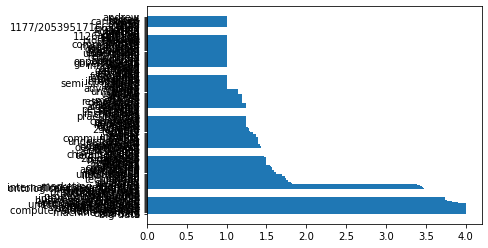

In [6]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.barh(range(len(k)),v)
    plt.yticks(range(len(k)),k,rotation='horizontal')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using Word Cloud. We will need to install another library to plot the word cloud from our keyword list.

In [7]:
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 366 kB 19.6 MB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


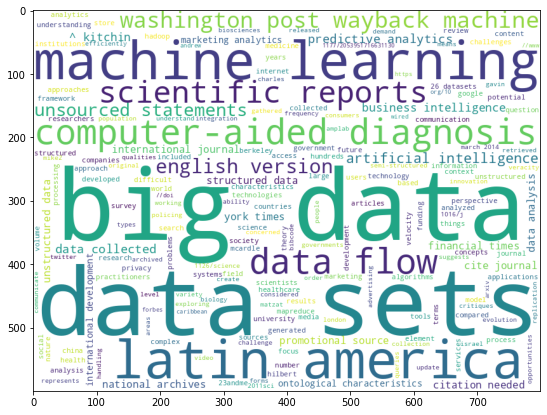

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

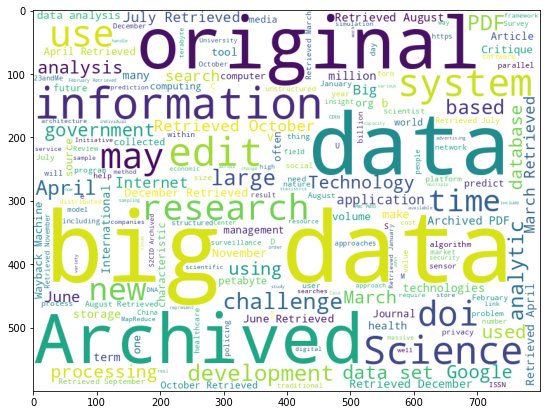

In [9]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [10]:
wc.generate(text).to_file('ds_wordcloud.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81382865-47e0-438f-b403-71f1a81403df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>